# Montaremos um programa para simular um portfólio com vários ativos (Neste programa ainda não poderemos fazer rebalanceamentos então os pesos de cada ativos serão setados apenas no início do período): 

***Para fins de exemplificação simularemos um portfolio composto por 50% de ações de bancos e 50% de dólar:***

**Importamos os módulos necessários:**

In [1]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as dt 
import matplotlib.pyplot as plt 
import quandl as qd

#Importando um módulo próprio que possui uma série de funções para métricas backtest:
from importlib import reload  
import metricas_de_backtest as bt
reload(bt)

<module 'metricas_de_backtest' from 'C:\\Users\\pedro\\Projetos do Github\\Projetos Públicos Github\\metricas_de_backtest.py'>

**Fazemos uma lista com todos os ativos que vão compor a nossa carteira:**

In [37]:
assets_in_portfolio = ['ITUB4.SA','BBDC3.SA','SANB11.SA','BBAS3.SA','USDBRL=X']

**Definimos os pesos que queremos dar para cada ativo no início da composição do portfólio**

In [38]:
assets_weights_in_portfolio = [0.125,0.125,0.125,0.125,0.5]

**Definimos a data de ínicio do portfólio:**

In [39]:
inicio = '2010-01-01'

**Importamos os dados dos ativos do portfólio e de benchmarks (Neste programa teremos Ibovespa e CDI):**

In [40]:
# Importamos dados dos ativos do portfólio e de benchmarks:
portfolio_assets_benchmarks = pd.DataFrame()
for i in assets_in_portfolio: 
    portfolio_assets_benchmarks[i]=dt.DataReader(i,data_source='yahoo',start=inicio)['Adj Close']

# Adicionamos dados do Ibovespa: 
portfolio_assets_benchmarks['IBOV']= dt.DataReader('^BVSP',data_source='yahoo',start=inicio)['Adj Close']

#Inserindo o CDI:
cdi = (qd.get('BCB/12',start_date=inicio)/100).add(1).cumprod()
portfolio_assets_benchmarks['CDI'] = cdi.loc[portfolio_assets_benchmarks.index]

# Vamos retirar todas as linhas que contém nans,pode ter nans caso acontecer de as datas de negociação não coincidirem:
portfolio_assets_benchmarks.dropna(inplace=True)

# Normalizamos para que todos os ativos comecem em 1: 
portfolio_assets_benchmarks/=portfolio_assets_benchmarks.iloc[0]

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


**Compondo/Montando a evolução do portfólio:**

In [41]:
portfolio = (assets_weights_in_portfolio*portfolio_assets_benchmarks[assets_in_portfolio]).sum(axis=1)

**Plotando os resultados com algumas métricas:**

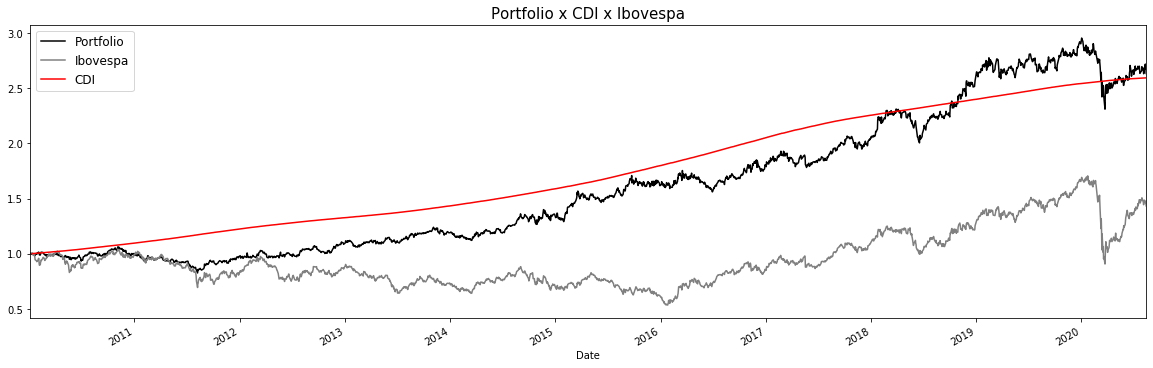

CAGR do portfolio: 0.11236266565125641 
CAGR CDI: 0.11052107502361674 
CAGR IBOVESPA: 0.04044718440498252

Vol do portfolio: 0.16096471173702875 
Vol CDI: 0.0031298750670639567 
Vol IBOVESPA: 0.2687393762206344

Max Drawdown do portfolio: -0.22190692254648003 
Max Drawdown CDI: 0.0 
Max Drawdown IBOVESPA: -0.4863143185927996


In [42]:
portfolio.plot(figsize=(20,6),label='Portfolio',color='Black')
portfolio_assets_benchmarks['IBOV'].plot(figsize=(20,6),label='Ibovespa',color='grey')
portfolio_assets_benchmarks['CDI'].plot(figsize=(20,6),label='CDI',color='Red')
plt.title('Portfolio x CDI x Ibovespa',fontsize=15)
plt.legend(fontsize=12)
plt.show()

print('CAGR do portfolio: '+str(bt.retorno_anualizado(portfolio)),
      '\nCAGR CDI: '+str(bt.retorno_anualizado(portfolio_assets_benchmarks['CDI'])),
      '\nCAGR IBOVESPA: '+str(bt.retorno_anualizado(portfolio_assets_benchmarks['IBOV'])))
print('\nVol do portfolio: '+str(bt.volatilidade_anualizada(portfolio.pct_change())),
     '\nVol CDI: '+str(bt.volatilidade_anualizada(portfolio_assets_benchmarks['CDI'].pct_change())),
      '\nVol IBOVESPA: '+str(bt.volatilidade_anualizada(portfolio_assets_benchmarks['IBOV'].pct_change())))
print('\nMax Drawdown do portfolio: '+str(bt.maximum_drawdown(portfolio)),
     '\nMax Drawdown CDI: '+str(bt.maximum_drawdown(portfolio_assets_benchmarks['CDI'])),
      '\nMax Drawdown IBOVESPA: '+str(bt.maximum_drawdown(portfolio_assets_benchmarks['IBOV'])))

**Montamos uma tabela com os retornos anuais do portfolio e dos benchmarks:**

In [43]:
portfolio_benchmarks_yearly_returns = pd.DataFrame()
portfolio_benchmarks_yearly_returns['Portfolio']=portfolio.resample('Y',kind='period').last().pct_change()*100
portfolio_benchmarks_yearly_returns['IBOV']=portfolio_assets_benchmarks['IBOV'].resample('Y',kind='period').last().pct_change()*100
portfolio_benchmarks_yearly_returns['CDI']=portfolio_assets_benchmarks['CDI'].resample('Y',kind='period').last().pct_change()*100
portfolio_benchmarks_yearly_returns.iloc[1:]

,Portfolio,IBOV,CDI
Date,,,
2011,-2.883869,-18.109804,11.594343
2012,11.814274,7.396835,8.413241
2013,9.319958,-15.495800,8.053270
2014,13.680895,-2.912226,10.806856
2015,19.502112,-13.312136,13.228925
2016,11.700937,38.931949,14.001129
2017,12.882010,26.856725,9.981223
2018,25.939286,15.032329,6.395165
2019,13.020992,31.946704,5.967840
